In [6]:
import pandas as pd

In [7]:
df=pd.read_csv("D:\SQL\TRIALSF3.csv")

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [9]:
df.shape #total cell count in the given relational dataset

(1048575, 11)

In [10]:
print(df['isFraud'].unique()) #to find the unique values 

[0. 1.]


In [11]:
df.isnull().sum() #to check for any kind of null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.describe() #mean , median and min-max values 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740055e+05,8.938049e+05,9.781600e+05,1.114193e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971725e+06,3.008246e+06,2.296779e+06,2.416554e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00,0.0


In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [14]:
table1=df[['amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFraud','type']]

In [15]:
table1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,PAYMENT
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,PAYMENT
2,181.00,181.0,0.00,0.0,0.0,1.0,TRANSFER
3,181.00,181.0,0.00,21182.0,0.0,1.0,CASH_OUT
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,PAYMENT


In [11]:
print(df['type'].unique())
print(df['isFraud'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
[0. 1.]


In [12]:
table1=pd.get_dummies(table1,drop_first=True)

In [13]:
table1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0


In [14]:
table1.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
amount,1.000000,0.004864,-0.001132,0.215562,0.311942,0.128862,0.071255,-0.047878,-0.397464,0.539278
oldbalanceOrg,0.004864,1.000000,0.999050,0.093305,0.064050,0.003829,-0.204550,-0.022109,-0.186254,-0.081977
newbalanceOrig,-0.001132,0.999050,1.000000,0.095179,0.063722,-0.009438,-0.214549,-0.022489,-0.190113,-0.087814
oldbalanceDest,0.215562,0.093305,0.095179,1.000000,0.978401,-0.007553,0.130118,0.010703,-0.303959,0.130364
newbalanceDest,0.311942,0.064050,0.063722,0.978401,1.000000,-0.000495,0.160139,0.007814,-0.329070,0.197709
isFraud,0.128862,0.003829,-0.009438,-0.007553,-0.000495,1.000000,0.010328,-0.002741,-0.023566,0.049279
type_CASH_OUT,0.071255,-0.204550,-0.214549,0.130118,0.160139,0.010328,1.000000,-0.061772,-0.531032,-0.223456
type_DEBIT,-0.047878,-0.022109,-0.022489,0.010703,0.007814,-0.002741,-0.061772,1.000000,-0.059254,-0.024934
type_PAYMENT,-0.397464,-0.186254,-0.190113,-0.303959,-0.329070,-0.023566,-0.531032,-0.059254,1.000000,-0.214348
type_TRANSFER,0.539278,-0.081977,-0.087814,0.130364,0.197709,0.049279,-0.223456,-0.024934,-0.214348,1.000000


In [15]:
import seaborn as sns

In [16]:
#implementing pairplotting

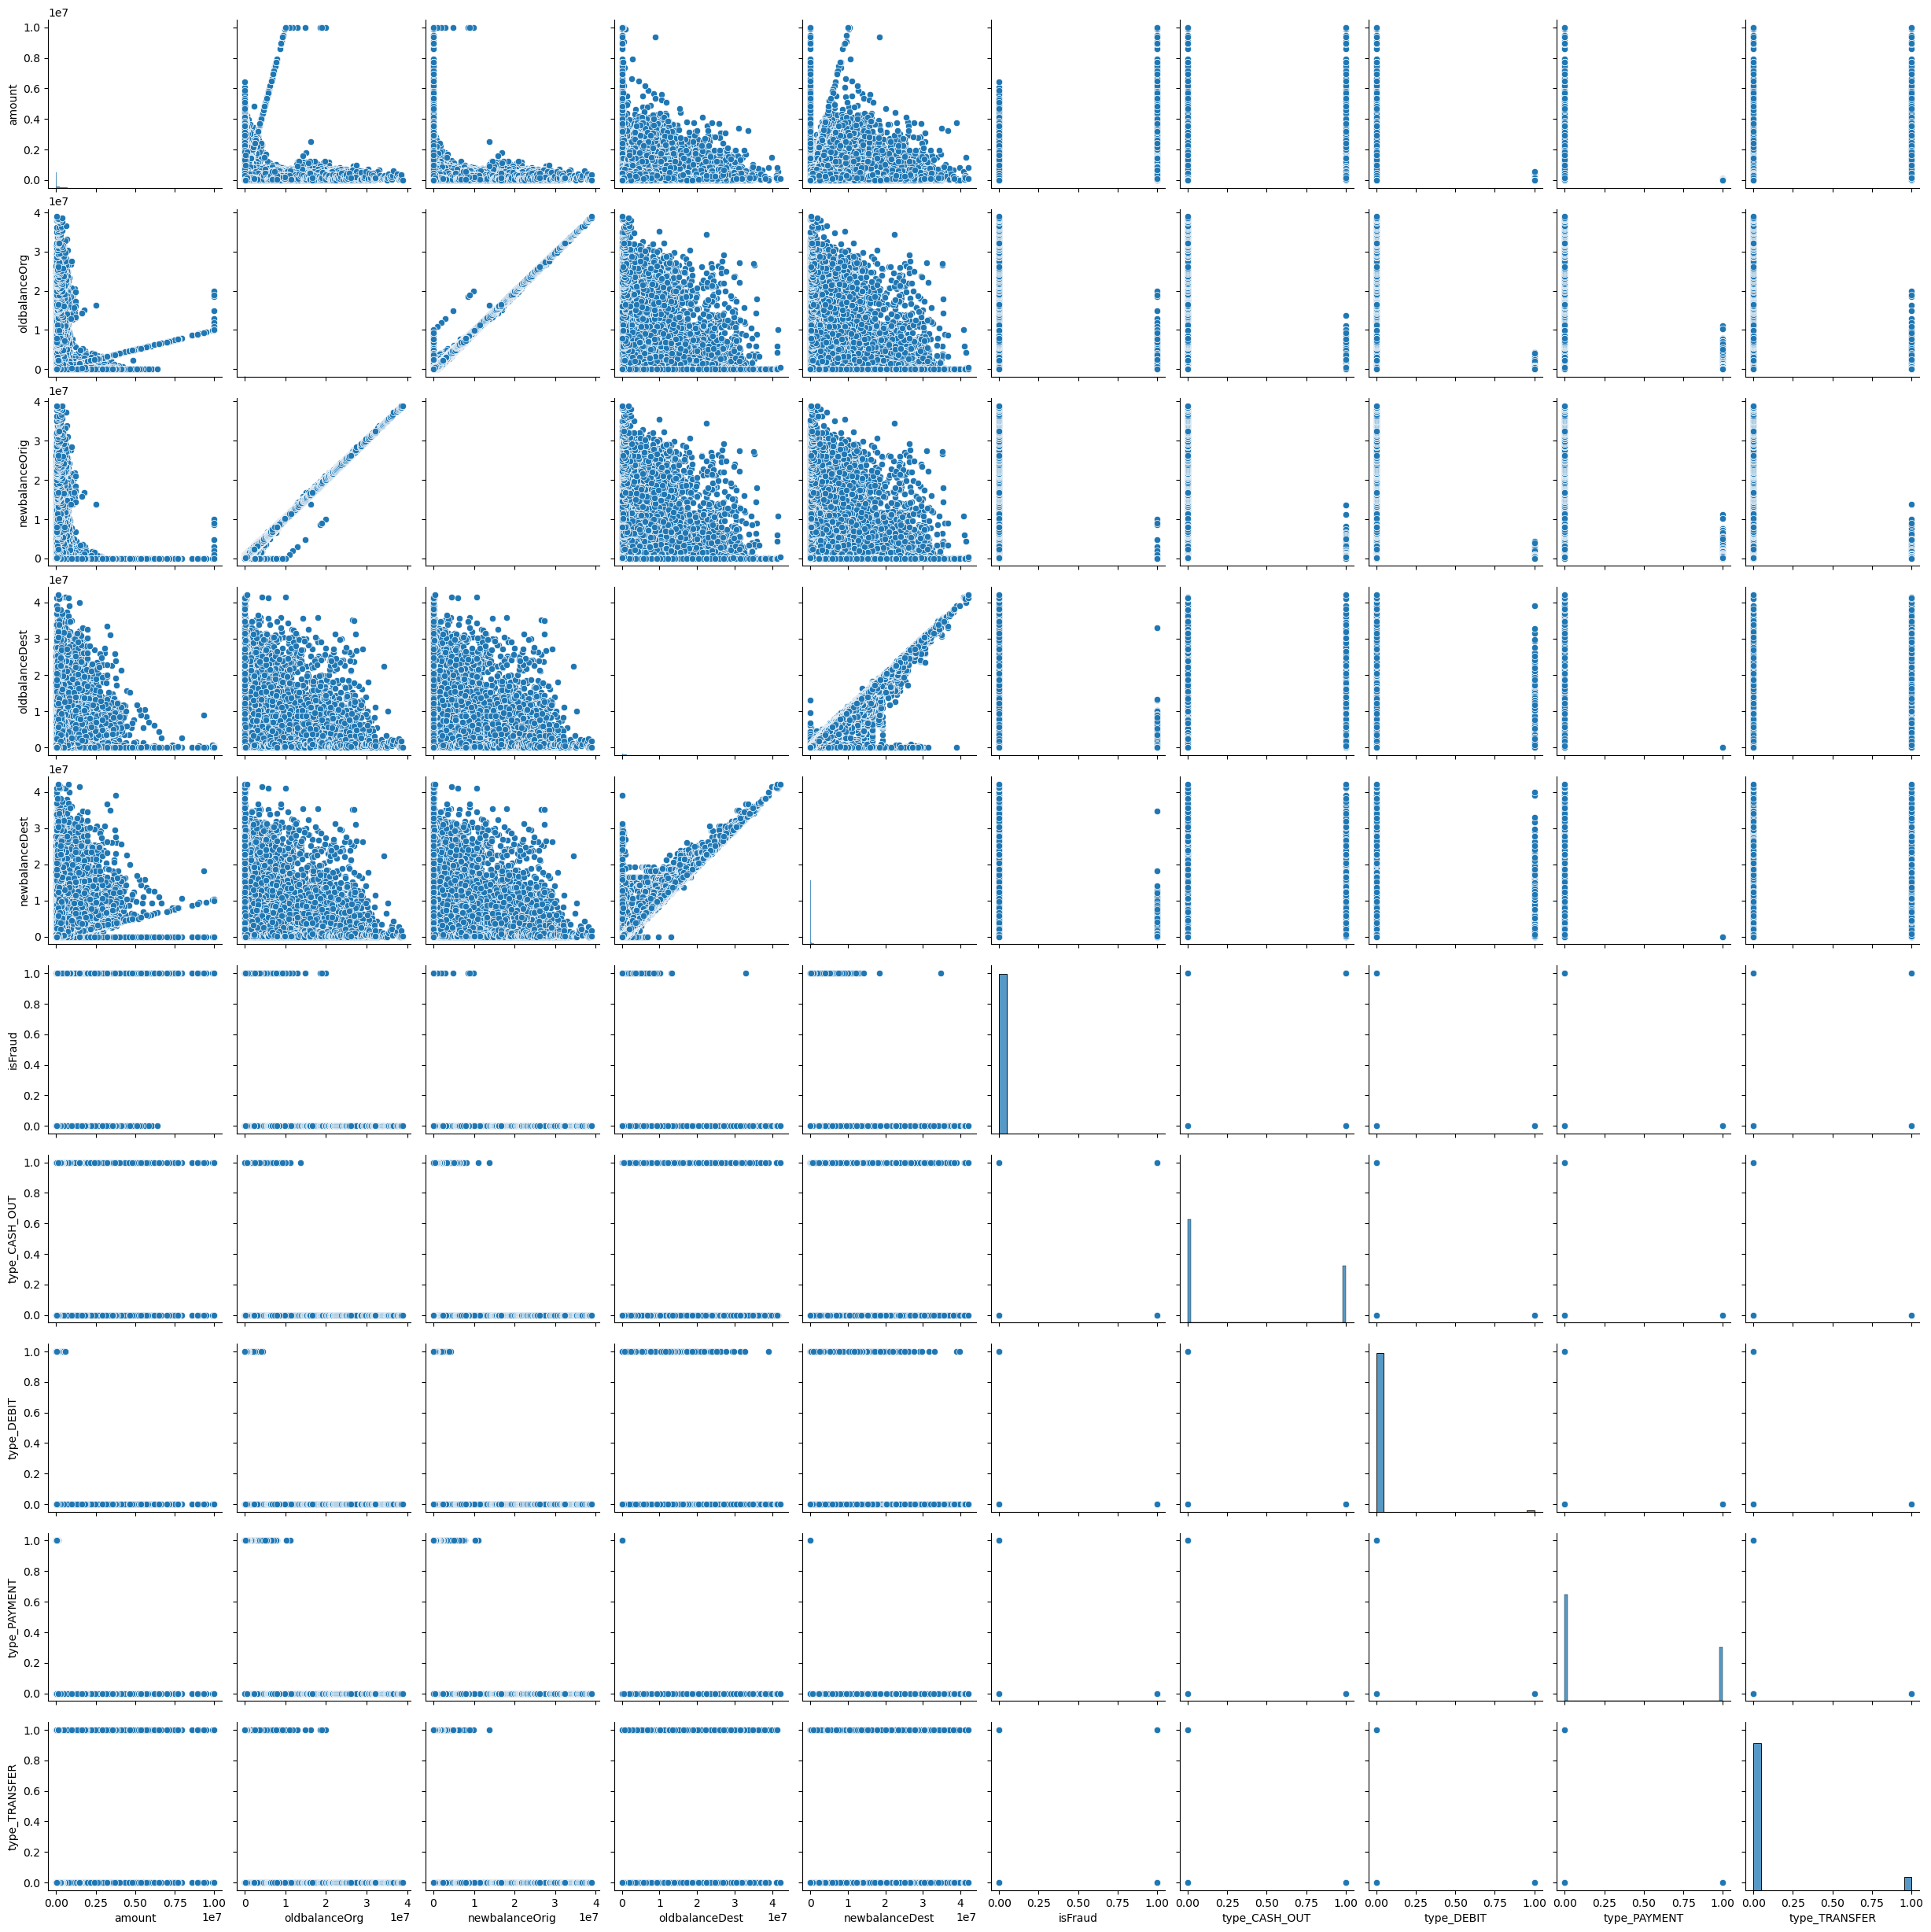

In [17]:
sns.pairplot(table1)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#working on correlation

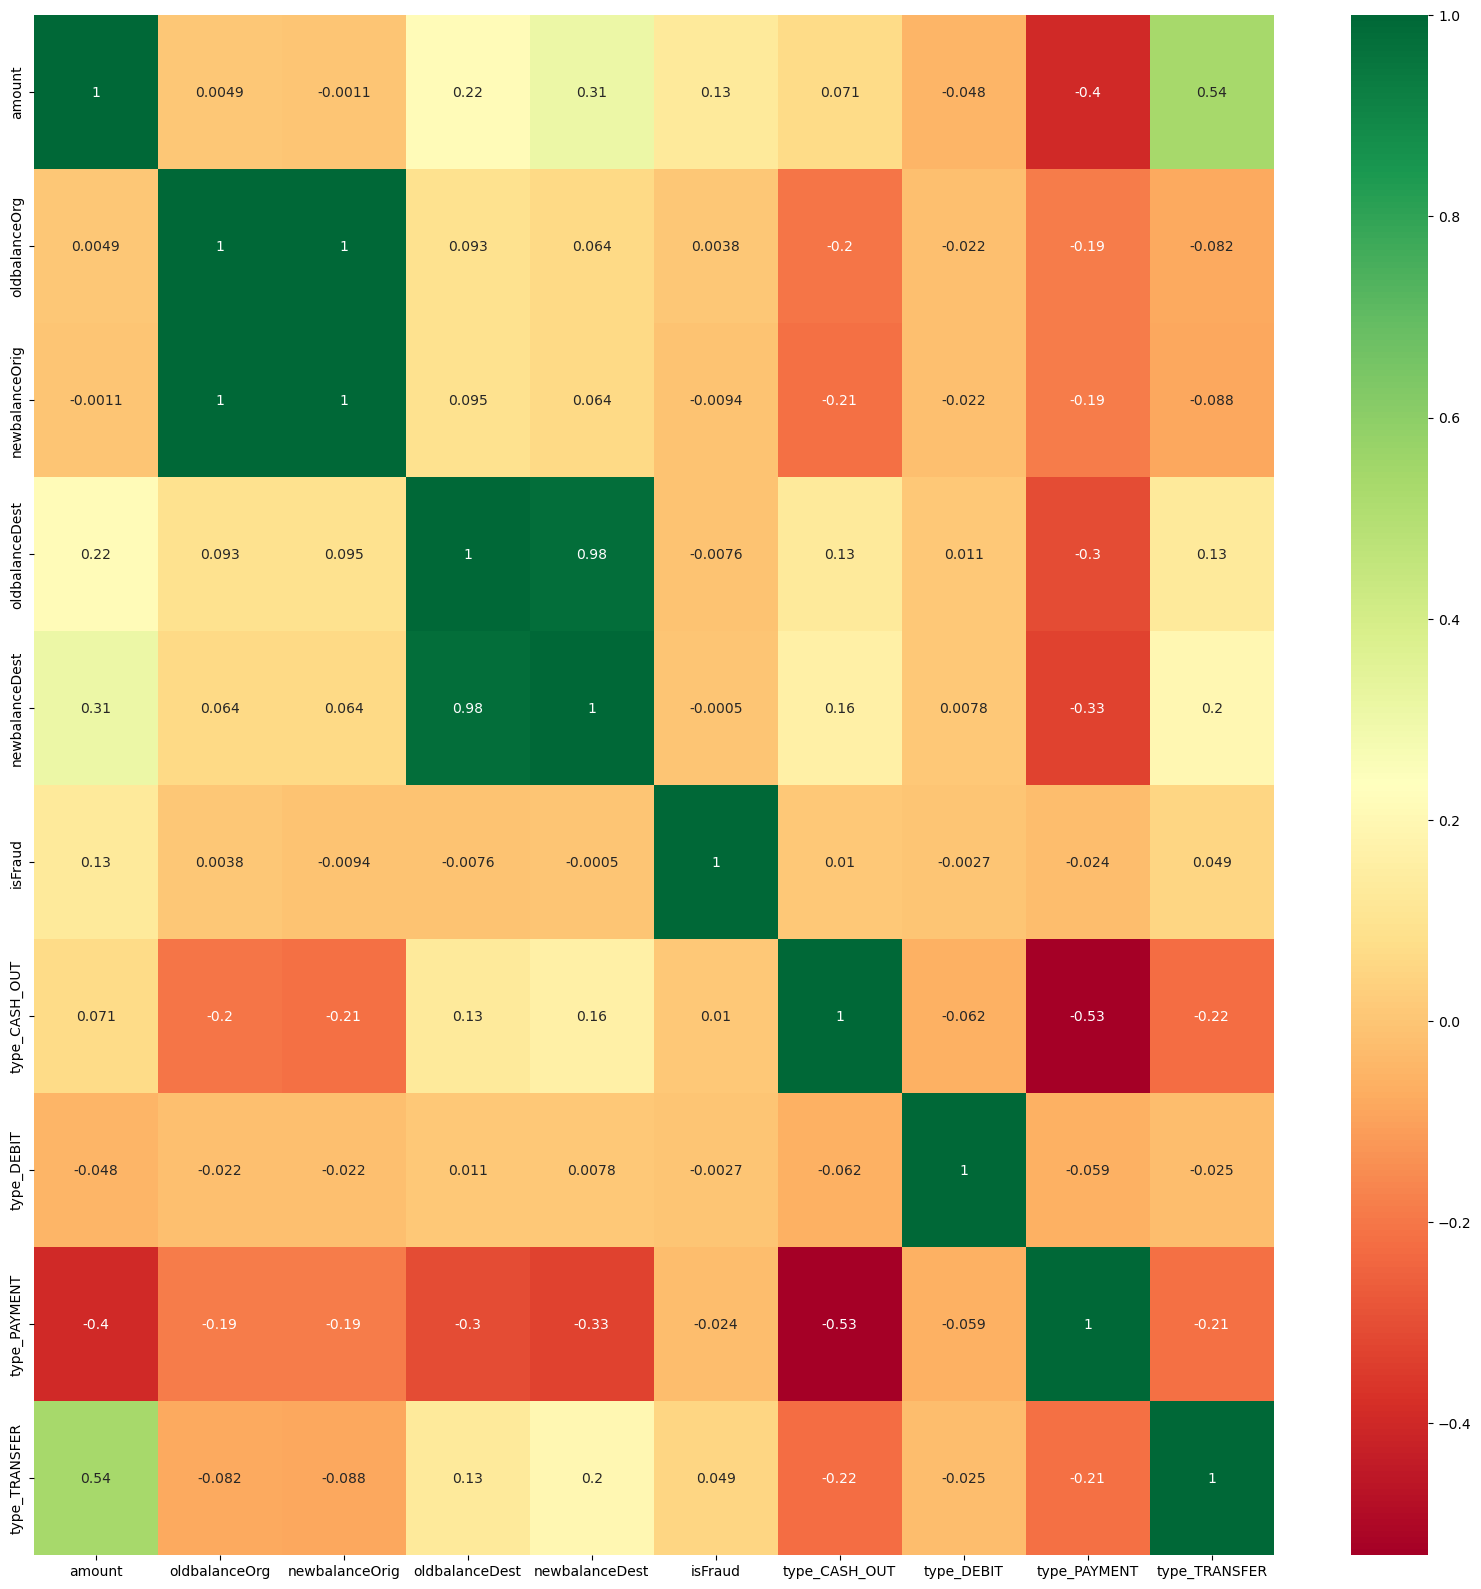

In [20]:
corrmat=table1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(table1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
table1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0


In [22]:
#to identify independant and dependant features

In [16]:
X=table1.iloc[:,0]
y=table1.iloc[:,0]

In [17]:
X.head()

0     9839.64
1     1864.28
2      181.00
3      181.00
4    11668.14
Name: amount, dtype: float64

In [18]:
y.head()

0     9839.64
1     1864.28
2      181.00
3      181.00
4    11668.14
Name: amount, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
X_train.shape

(838860,)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [22]:
import numpy as np
#hyper parameters tuning
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [25]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [26]:
rf=RandomForestRegressor()

In [27]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [29]:
dummies=pd.get_dummies(table1[["type"]])
dummies

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1048570,0,1,0,0,0
1048571,0,0,0,1,0
1048572,0,0,0,1,0
1048573,0,0,0,1,0


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
table1["type"] = pd.to_numeric(table1["type"], errors='coerce', downcast="float")

In [32]:
print(table1.dtypes)

amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
type              float32
dtype: object
